### Phase 3 Project 

### by Nicholus Magak 

### Using CRISP-DM Methodology

## 1. Business Understanding

#### Premise:
As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Your audience could be someone guiding those public health efforts.

#### Desired outcome:
Create a model that can accurately predict whether a person, based on their attributes given in the data both categorical and continuous is most likely given the seasonal flu (or depending if there is time, the H1N1) vaccine(s).

Eventually, the prediction algorithm can be used in identifying people with potential illness to the seasonal flu and either prevent or have a concrete solution in place due to early detection.

## 2. Data Understanding

This section aims at importing and descrbing the individual features within the dataset

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading the data from the site
# this is the X features of the dataset which describe a person's attributes
train_data_df = pd.read_csv('data/training_set_features.csv')
# print(train_data_df.head())

# This dataframe contains the targets i.e y of the dataset
train_labels_df = pd.read_csv('data/training_set_labels.csv')
# print(train_labels_df.head())

# Not necessary for now
# validation_data_df = pd.read_csv('data/test_set_features.csv')
# print(test_data_df.head())

In [55]:
train_data_df.shape

(26707, 36)

In [3]:
# the columns in the dataset
train_data_df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [4]:
train_data_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [5]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [6]:
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [7]:
train_labels_df.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


The information above basically translates into:
1. The train_data_df is the X data
2. The train_labels_df is the y data

## 3. Data Preparation

In [8]:
# Define X and y
X = train_data_df[train_data_df.columns.difference(['respondent_id'])].copy()

# Choosing the target variable
print(train_labels_df['h1n1_vaccine'].value_counts())

print(train_labels_df['seasonal_vaccine'].value_counts())

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


#### Choosing y of seasonal_vaccine because it more balanced as a start target perhaps the h1 will be done after in the event of early completion

Therefore, the target variable for the dataset is the 'seasonal_vaccine' class

In [9]:
y = train_labels_df['seasonal_vaccine'].copy()

In [10]:
# viewing the shape of the data
print(f'The shape of X is {X.shape}')

print(f'The shape of y is {y.shape}')

The shape of X is (26707, 35)
The shape of y is (26707,)


In [11]:
# Checking the data types, and whether they're appropriate
X.head(3)

,age_group,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,behavioral_wash_hands,census_msa,child_under_6_months,...,marital_status,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_h1n1_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,opinion_seas_vacc_effective,race,rent_or_own,sex
0,55 - 64 Years,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Non-MSA,0.0,...,Not Married,1.0,2.0,3.0,1.0,2.0,2.0,White,Own,Female
1,35 - 44 Years,0.0,1.0,0.0,0.0,1.0,1.0,1.0,"MSA, Not Principle City",0.0,...,Not Married,4.0,4.0,5.0,2.0,4.0,4.0,White,Rent,Male
2,18 - 34 Years,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"MSA, Not Principle City",0.0,...,Not Married,1.0,1.0,3.0,1.0,2.0,4.0,White,Own,Male


A lot of encoding will have to be done to the categorical columns

### Dealing with missing values

In [12]:
# Checking for null values
X.isna().sum()

age_group                          0
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
behavioral_wash_hands             42
census_msa                         0
child_under_6_months             820
chronic_med_condition            971
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
education                       1407
employment_industry            13330
employment_occupation          13470
employment_status               1463
h1n1_concern                      92
h1n1_knowledge                   116
health_insurance               12274
health_worker                    804
hhs_geo_region                     0
household_adults                 249
household_children               249
income_poverty                  4423
marital_status                  1408
opinion_h1n1_risk                388
o

In [13]:
# total length of dataset
data_len = len(X)
data_len

26707

#### Removing features with extreme levels of missing data to prevent introducing error or unnecessary level of bias or variance to potentially very sensitive data

In [14]:
# removing features with missing data of 40% or more
new_X_columns = []
for column in X.columns:
    if (X[column].isna().sum()/data_len) > 0.4:
        continue
    else:
        print(f'{column}: {X[column].isna().sum()}')
        new_X_columns.append(column)

age_group: 0
behavioral_antiviral_meds: 71
behavioral_avoidance: 208
behavioral_face_mask: 19
behavioral_large_gatherings: 87
behavioral_outside_home: 82
behavioral_touch_face: 128
behavioral_wash_hands: 42
census_msa: 0
child_under_6_months: 820
chronic_med_condition: 971
doctor_recc_h1n1: 2160
doctor_recc_seasonal: 2160
education: 1407
employment_status: 1463
h1n1_concern: 92
h1n1_knowledge: 116
health_worker: 804
hhs_geo_region: 0
household_adults: 249
household_children: 249
income_poverty: 4423
marital_status: 1408
opinion_h1n1_risk: 388
opinion_h1n1_sick_from_vacc: 395
opinion_h1n1_vacc_effective: 391
opinion_seas_risk: 514
opinion_seas_sick_from_vacc: 537
opinion_seas_vacc_effective: 462
race: 0
rent_or_own: 2042
sex: 0


In [15]:
# Getting the less cumbersome data
working_X = X[new_X_columns].copy()
working_X.columns

Index(['age_group', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'behavioral_wash_hands', 'census_msa', 'child_under_6_months',
       'chronic_med_condition', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'education', 'employment_status', 'h1n1_concern', 'h1n1_knowledge',
       'health_worker', 'hhs_geo_region', 'household_adults',
       'household_children', 'income_poverty', 'marital_status',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_h1n1_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'opinion_seas_vacc_effective', 'race',
       'rent_or_own', 'sex'],
      dtype='object')

In [16]:
# viewing the columns in order to deal with missing vals
for column in working_X.columns:
    if (working_X[column].isna().sum()) > 0:
        print( working_X[column].head(3))

0    0.0
1    0.0
2    0.0
Name: behavioral_antiviral_meds, dtype: float64
0    0.0
1    1.0
2    1.0
Name: behavioral_avoidance, dtype: float64
0    0.0
1    0.0
2    0.0
Name: behavioral_face_mask, dtype: float64
0    0.0
1    0.0
2    0.0
Name: behavioral_large_gatherings, dtype: float64
0    1.0
1    1.0
2    0.0
Name: behavioral_outside_home, dtype: float64
0    1.0
1    1.0
2    0.0
Name: behavioral_touch_face, dtype: float64
0    0.0
1    1.0
2    0.0
Name: behavioral_wash_hands, dtype: float64
0    0.0
1    0.0
2    0.0
Name: child_under_6_months, dtype: float64
0    0.0
1    0.0
2    1.0
Name: chronic_med_condition, dtype: float64
0    0.0
1    0.0
2    NaN
Name: doctor_recc_h1n1, dtype: float64
0    0.0
1    0.0
2    NaN
Name: doctor_recc_seasonal, dtype: float64
0          < 12 Years
1            12 Years
2    College Graduate
Name: education, dtype: object
0    Not in Labor Force
1              Employed
2              Employed
Name: employment_status, dtype: object
0    1.0

In [17]:
def outcome(df):
        for column in df.columns:
            if (isinstance(df[column][0], float)):
                df[column] = df[column].interpolate()
            else:
                df[column] = df[column].fillna(df[column].mode()[0])
        return df        

In [18]:
# Filling null/missing vals
working_X = outcome(working_X)

In [19]:
working_X.isna().sum()

age_group                      0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
behavioral_wash_hands          0
census_msa                     0
child_under_6_months           0
chronic_med_condition          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
education                      0
employment_status              0
h1n1_concern                   0
h1n1_knowledge                 0
health_worker                  0
hhs_geo_region                 0
household_adults               0
household_children             0
income_poverty                 0
marital_status                 0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_h1n1_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
opinion_seas_vacc_effective    0
race                           0
rent_or_ow

### Encoding the categorical features

In [20]:
categorical_columns = []
for column in working_X.columns:
    # print(working_X[column].dtypes)
    if working_X[column].dtypes == object:
        categorical_columns.append(column)
categorical_columns

['age_group',
 'census_msa',
 'education',
 'employment_status',
 'hhs_geo_region',
 'income_poverty',
 'marital_status',
 'race',
 'rent_or_own',
 'sex']

In [21]:
from sklearn.preprocessing import LabelEncoder
def encoding(df):
    LE = LabelEncoder()
    for col in categorical_columns:
        df[col]= LE.fit_transform(df[col])
    return df

In [22]:
working_X = encoding(working_X)

In [23]:
working_X[categorical_columns].head()

,age_group,census_msa,education,employment_status,hhs_geo_region,income_poverty,marital_status,race,rent_or_own,sex
0,3,2,1,1,8,2,1,3,0,0
1,1,0,0,0,1,2,1,3,1,1
2,0,0,2,0,9,0,1,3,0,1
3,4,1,0,1,5,2,1,3,1,0
4,2,0,3,0,9,0,0,3,0,0


In [24]:
# Split into data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(working_X, y, test_size=0.3, random_state=42)

### Beginning of redundant functions

In [25]:
def modelScores(actual_y, y_pred):
    print('Precision score: ',np.round(precision_score(actual_y, y_pred),2))
    print('Recall score: ',np.round(recall_score(actual_y, y_pred),2))
    print('Accuracy score: ',np.round(accuracy_score(actual_y, y_pred),2))
    print('F1 score: ',np.round(f1_score(actual_y, y_pred),2))

In [26]:
def roc_curveDiagram(y_test, y_pred, estimator):
    # ROC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr,  tpr=tpr, roc_auc=roc_auc,
                                     estimator_name=estimator)
    display.plot()
    # metrics.plot_roc_curve(logreg, X_test, y_test)  
    plt.show();

In [27]:
def confusionMat(X_test, gridsearch, y_test):
    # Confusion matrix
    y_pred = gridsearch.predict(X_test)
    cm_reg = confusion_matrix(y_test, y_pred, labels=gridsearch.classes_)
    disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg, display_labels=gridsearch.classes_)
    disp_reg.plot()
    plt.show()

### End of redundant functions

# Logistic Regression (Baseline model)

## 4. Modeling

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)

## 5. Evaluation

In [29]:
# Getting the eval metrics
modelScores(y_test, y_test_pred)

Precision score:  0.77
Recall score:  0.74
Accuracy score:  0.78
F1 score:  0.75


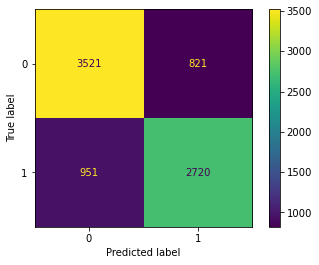

In [30]:
# confusion matrix
confusionMat(X_test, logreg, y_test)

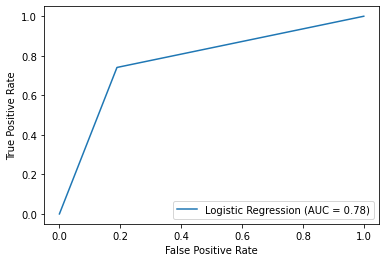

In [31]:
# ROC Curve
roc_curveDiagram(y_test, y_test_pred, 'Logistic Regression')

### Baseline conclusion:
Very good accuracy and f1 score was achieved. Since the dataset was quite balanced in the representation of target classes, the eventual outcome was fairly similar.

Now, to potentially improve on the overall accuracy by using tuned hyper params, and other classifiers (ie. Decision Tree and Gaussian NB) 

# Logistic Regression with hyperparam tuning

## 4. Modeling

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('class', LogisticRegression())
])

# Unlike the initial logreg, this one uses tuned/specified hyper params
# Max iter specifies how many iterations the program should run before terminating incase convergence is not found
# Penalty specifies which regularization method to use, in this case Ridge regression
# random state dictates how to randomize the data during the splits
# solver are algos that help in optimizing for logistic reg

grid = [{
    'scaler': [StandardScaler(), MinMaxScaler()],
    'class__max_iter': [1000],
    'class__penalty': ['l2',],
    'class__random_state': [1, 10, 42],
    'class__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}]

gridsearch = GridSearchCV(estimator=pipe,
                         param_grid=grid,
                         scoring='accuracy',
                         cv=10)

In [34]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('class', LogisticRegression())]),
             param_grid=[{'class__max_iter': [1000], 'class__penalty': ['l2'],
                          'class__random_state': [1, 10, 42],
                          'class__solver': ['liblinear', 'newton-cg', 'lbfgs',
                                            'sag', 'saga'],
                          'scaler': [StandardScaler(), MinMaxScaler()]}],
             scoring='accuracy')

## 5. Evaluation

In [35]:
print(f'The best score of the grid search with different hyperparams: \n{gridsearch.score(X_test, y_test)}')

The best score of the grid search with different hyperparams: 
0.7789841507550231


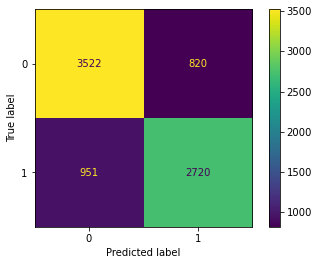

In [36]:
# confusion matrix
confusionMat(X_test, gridsearch, y_test)

In [38]:
# Getting the eval metrics
y_pred_gs = gridsearch.predict(X_test)
modelScores(y_test, y_pred_gs)

Precision score:  0.77
Recall score:  0.74
Accuracy score:  0.78
F1 score:  0.75


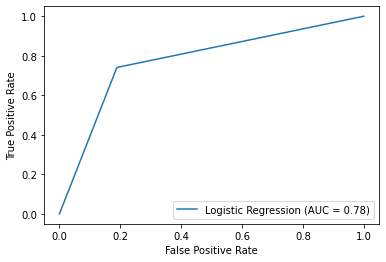

In [39]:
# ROC Curve
roc_curveDiagram(y_test, y_pred_gs, 'Logistic Regression')

#### The best 

# Decision Tree Classifier

## 4. Modeling

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('class', DecisionTreeClassifier())
])

# criterion for the DT specifies which information metrics to use to measure impurity
# max depth is how deep a tree should go, starting with small to large depths
# min samples leaf specifies the least amount of samples to be in a leaf

grid = [{
    'scaler': [StandardScaler(), MinMaxScaler()],
    'class__criterion': ['gini', 'entropy'],
    'class__max_depth': [1, 3, 5, 10],
    'class__min_samples_leaf': [5],
    'class__random_state': [0, 42, 100]
}]

gridsearch_DT = GridSearchCV(estimator=pipe,
                         param_grid=grid,
                         scoring='accuracy',
                         cv=10)

In [42]:
gridsearch_DT.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('class', DecisionTreeClassifier())]),
             param_grid=[{'class__criterion': ['gini', 'entropy'],
                          'class__max_depth': [1, 3, 5, 10],
                          'class__min_samples_leaf': [5],
                          'class__random_state': [0, 42, 100],
                          'scaler': [StandardScaler(), MinMaxScaler()]}],
             scoring='accuracy')

## 5. Evaluation

In [43]:
print(f'The best score of the grid search with different hyperparams: \n{gridsearch_DT.score(X_test, y_test)}')

The best score of the grid search with different hyperparams: 
0.7621365281417696


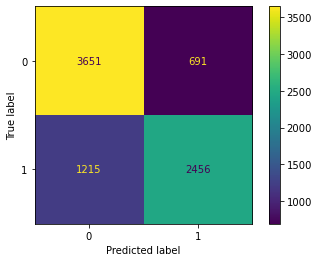

In [44]:
# confusion matrix
confusionMat(X_test, gridsearch_DT, y_test)

In [45]:
# Getting the eval metrics
y_pred_dt = gridsearch_DT.predict(X_test)
modelScores(y_test, y_pred_dt)

Precision score:  0.78
Recall score:  0.67
Accuracy score:  0.76
F1 score:  0.72


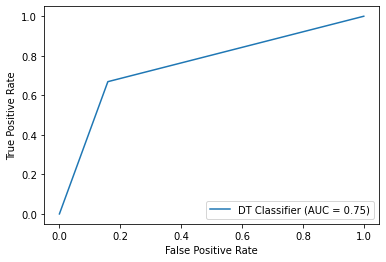

In [47]:
# ROC Curve
roc_curveDiagram(y_test, y_pred_dt, 'DT Classifier')

# Gaussian Naive Bayes Classifier

## 4. Modeling

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('class', GaussianNB())
])

# the var smoothing helps tackle the problem of zero probability

grid = [{
    'scaler': [StandardScaler(), MinMaxScaler()],
    'class__var_smoothing': [1e-11, 1e-10, 1e-9]
}]

gridsearch_NB = GridSearchCV(estimator=pipe,
                         param_grid=grid,
                         scoring='accuracy',
                         cv=10)

In [50]:
gridsearch_NB.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('class', GaussianNB())]),
             param_grid=[{'class__var_smoothing': [1e-11, 1e-10, 1e-09],
                          'scaler': [StandardScaler(), MinMaxScaler()]}],
             scoring='accuracy')

## 5. Evaluation

In [51]:
print(f'The best score of the grid search with different hyperparams: \n{gridsearch_NB.score(X_test, y_test)}')

The best score of the grid search with different hyperparams: 
0.7389242480968427


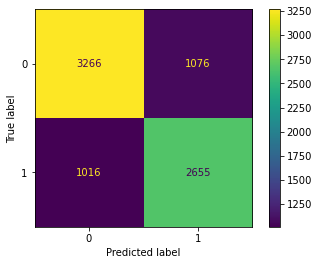

In [52]:
# confusion matrix
confusionMat(X_test, gridsearch_NB, y_test)

In [53]:
# Getting the eval metrics
y_pred_nb = gridsearch_NB.predict(X_test)
modelScores(y_test, y_pred_nb)

Precision score:  0.71
Recall score:  0.72
Accuracy score:  0.74
F1 score:  0.72


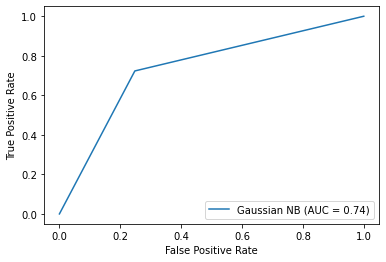

In [54]:
# ROC Curve
roc_curveDiagram(y_test, y_pred_nb, 'Gaussian NB')

## 6. Conclusion

Given that the data was balanced, the initial design was to go for accuracy. 

However, with knowledge of the ROC (Receiver Operating Characteristic) curve, I believe that is a better overall metric to use for the models above performance. ROC tells how much the model is able to distinguish between the classes.


The best performing model is the Logistic Regression with an AUC of 0.78 which can be considered 0.8 when rounded of to the nearest 1 decimal place. I believe that this represents it as a good performing model, however, not superb or excellent.

That is not very ideal when dealing with hospital data as we are here, but, it is performing well enough to consider better performance model strategies in future, such as, ensembling which would most likely beat this performance.